`Importing modules`

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [6]:
print('Welcome to the OK_Cupid data scientist project!\n')

Welcome to the OK_Cupid data scientist project!



`Reading the data from the csv file and making a pandas dataframe of it`

In [7]:
from my_python.filefinder import helper

In [8]:
df = helper.stat_display()

Ok, thank you.


`Gathering some info about the dataframe`

In [9]:
'Unique values of income: ', df.income.unique()

('Unique values of income: ',
 array([     -1,   80000,   20000,   40000,   30000,   50000,   60000,
        1000000,  150000,  100000,  500000,   70000,  250000], dtype=int64))

In [10]:
df[df.income == -1].head(1)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single


In [11]:
print('The number of observations with income value -1 is:', len(df[df.income == -1]))

The number of observations with income value -1 is: 48442


### We could drop the whole income column because -1 is not a usual categorical variable and definitely not a continuous numerical variable. Also, we can replace the values without avoiding bias.

In [12]:
df = df.drop('income', axis=1)

In [13]:
#df.religion.unique()
df.pets.unique()

array(['likes dogs and likes cats', 'has cats', 'likes cats', nan,
       'has dogs and likes cats', 'likes dogs and has cats',
       'likes dogs and dislikes cats', 'has dogs',
       'has dogs and dislikes cats', 'likes dogs',
       'has dogs and has cats', 'dislikes dogs and has cats',
       'dislikes dogs and dislikes cats', 'dislikes cats',
       'dislikes dogs and likes cats', 'dislikes dogs'], dtype=object)

In [14]:
'Unique values of height: ', df.height.unique()

('Unique values of height: ',
 array([75., 70., 68., 71., 66., 67., 65., 72., 62., 64., 69., 73., 74.,
        60., 63., 76., 61., 78., 79., 59., 80., 91., 83., 77., 58., 56.,
        95., 57., 87., 81., 36., 43., 52., 55., 53., 93.,  8., 54., 82.,
         3., 86., 42., 84., 94., 50.,  6., 47., 49., 48., 90., 88., nan,
        37.,  9., 51.,  1., 92., 26., 85., 89.,  4.]))

In [15]:
print('''\nThe smallest 18 year-old-man in the world is 29 inches, thus we can replace, or drop the values if they are lower than that.
https://www.mirror.co.uk/news/world-news/worlds-shortest-teenager-named-18-27050545''')


The smallest 18 year-old-man in the world is 29 inches, thus we can replace, or drop the values if they are lower than that.
https://www.mirror.co.uk/news/world-news/worlds-shortest-teenager-named-18-27050545


In [16]:
invalid_heights = (df.height <= 29) | (df.height.isna())

In [17]:
df = df[~invalid_heights]

In [18]:
df.describe()

,age,height
count,59936.000000,59936.000000
mean,32.340313,68.302306
std,9.453114,3.940899
min,18.000000,36.000000
25%,26.000000,66.000000
50%,30.000000,68.000000
75%,37.000000,71.000000
max,110.000000,95.000000


In [19]:
df.height.unique()

array([75., 70., 68., 71., 66., 67., 65., 72., 62., 64., 69., 73., 74.,
       60., 63., 76., 61., 78., 79., 59., 80., 91., 83., 77., 58., 56.,
       95., 57., 87., 81., 36., 43., 52., 55., 53., 93., 54., 82., 86.,
       42., 84., 94., 50., 47., 49., 48., 90., 88., 37., 51., 92., 85.,
       89.])

`Converting inch to cm`

In [20]:
df.height = df.height*2.54

`Take a look at the "nan" values of the whole dataframe`

In [21]:
df_isna = df.isna().sum().sort_values()
#df_isna

`Choosing some categorical and numerical variables (with zero or little null values) and put them into a list`

In [22]:
cats_and_nums = ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height', 'orientation', 'religion', 'sex', 'sign', 'smokes', 'status']

In [23]:
df.sex.replace(['m', 'f'], ['male', 'female'], inplace=True)

In [24]:
#for feature in cats_and_nums:
    #print(df[feature].value_counts())

In [25]:
#df = df[cats_and_nums].dropna()

In [26]:
from my_python.methods import df_cleaning as to_clean

In [27]:
changes = to_clean.unique_and_fill(cats_and_nums, df)

In [28]:
while True:
    try: x = next(changes)
    except StopIteration: break
    #print(x)

`Making a function which deals with features having many unique values in a way of making groups.`

`Making groups from signs, diets and religions by using the above function`

In [29]:
signs_ok = ['gemini', 'cancer', 'pisces', 'aquarius', 'taurus', 'virgo', 'sagittarius', 'leo', 'aries', 'libra', 'scorpio', 'capricorn']
sings_change = to_clean.change_values(signs_ok, df, 'sign')
diets_ok = ['kosher', 'halal', 'anything', 'other', 'vegetarian', 'vegan']
diets_change = to_clean.change_values(diets_ok, df, 'diet')
religions_ok = ['agnosticism', 'atheism', 'christianity', 'other', 'catholicism', 'buddhism', 'judaism', 'hinduism', 'islam']
religion_change = to_clean.change_values(religions_ok, df, 'religion')
sings_change

0             gemini
1             cancer
2             pisces
3             pisces
4           aquarius
            ...     
59941         cancer
59942            leo
59943    sagittarius
59944            leo
59945         gemini
Name: sign, Length: 59936, dtype: object

`Manual data manipulation of education unique values`

In [30]:
edu_unique = ['working on college/university', 'working on space camp', 'graduated from masters program', 'graduated from college/university',
'working on two-year college', 'unknown', 'graduated from high school', 'working on masters program', 'graduated from space camp',
'college/university', 'dropped out of space camp', 'graduated from ph.d program', 'graduated from law school', 'working on ph.d program',
'two-year college','graduated from two-year college', 'working on med school', 'dropped out of college/university', 'space camp',
'graduated from med school', 'dropped out of high school', 'working on high school', 'masters program', 'dropped out of ph.d program',
'dropped out of two-year college', 'dropped out of med school', 'high school', 'working on law school', 'law school',
'dropped out of masters program', 'ph.d program', 'dropped out of law school', 'med school']

In [31]:
high_school = ['working on college/university', 'working on two-year college', 'graduated from high school', 'working on masters program',
'high school','working on law school', 'working on high school']
college = ['graduated from law school', 'two-year college', 'graduated from two-year college','working on med school', 'law school']
master = ['graduated from masters program', 'graduated from college/university', 'college/university', 'working on ph.d program',
'masters program']
phd = ['graduated from ph.d program', 'graduated from med school', 'ph.d program', 'med school']
other = ['working on space camp', 'graduated from space camp', 'space camp']
dropped = ['dropped out of space camp', 'dropped out of college/university', 'dropped out of high school', 'dropped out of ph.d program',
'dropped out of two-year college', 'dropped out of med school', 'dropped out of masters program','dropped out of law school']

In [32]:
all_in = [high_school, college, master, phd, other, dropped]
new = ['high school', 'college', 'master', 'phd', 'other', 'dropped out']
edu_test = to_clean.list_replacement(df, 'education', all_in, new)

`Making pie charts, countplots and histograms of the features from the list`

In [33]:
from my_python.methods import visual as vis

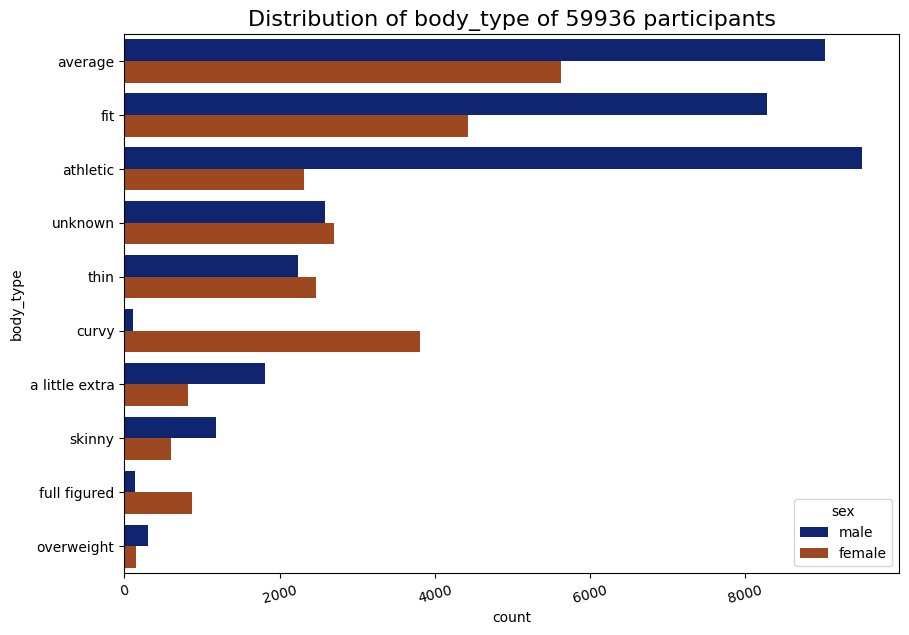

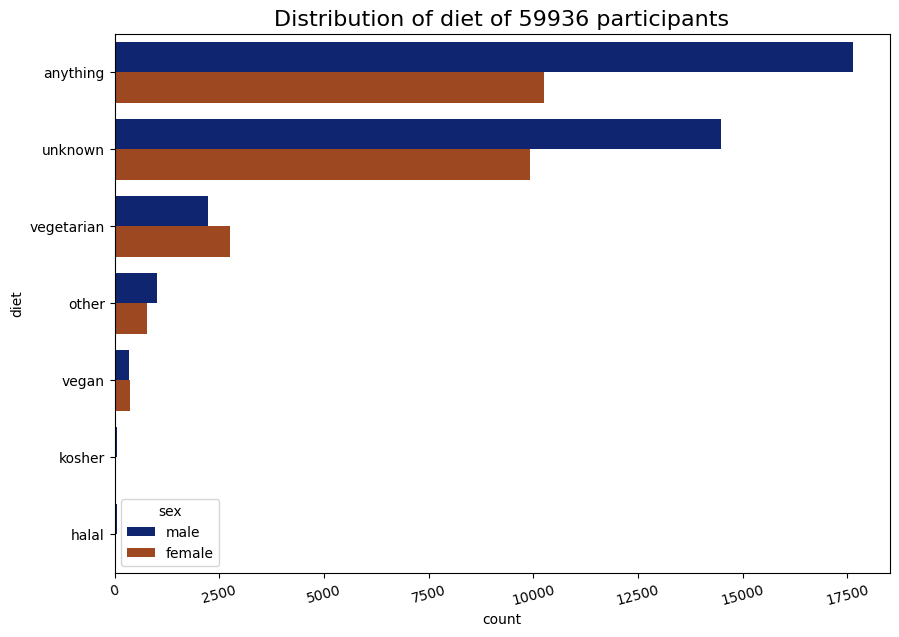

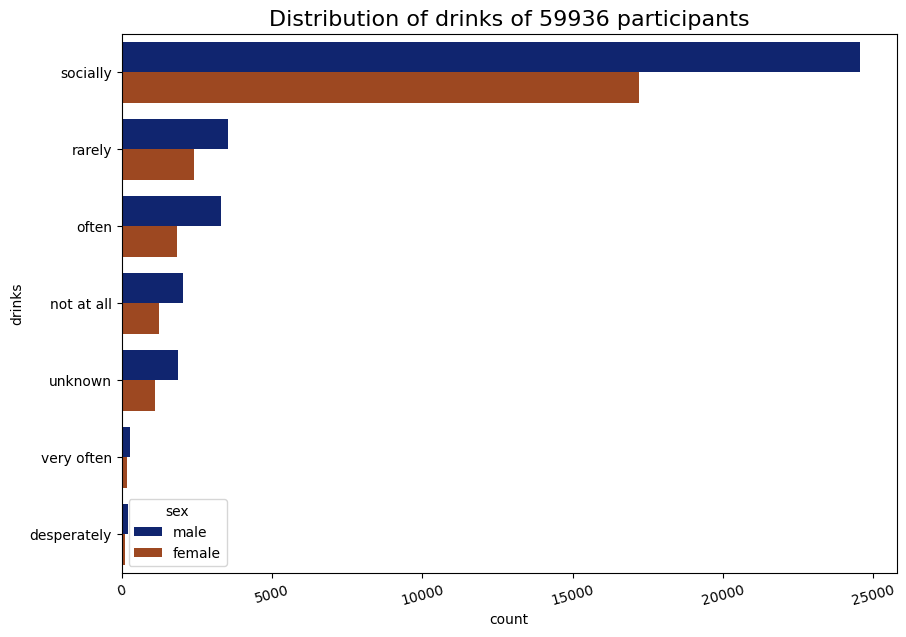

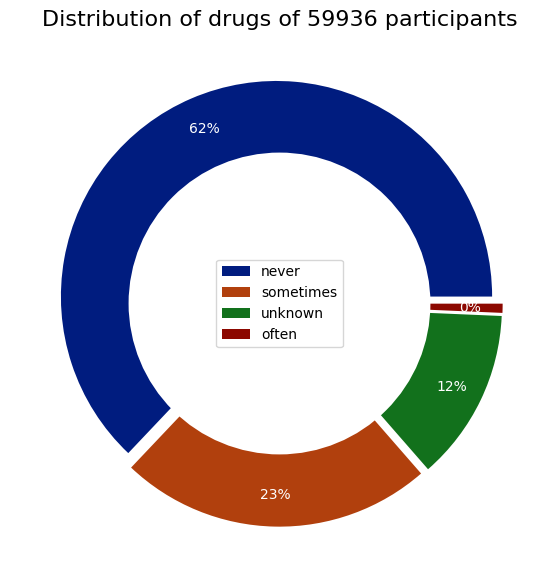

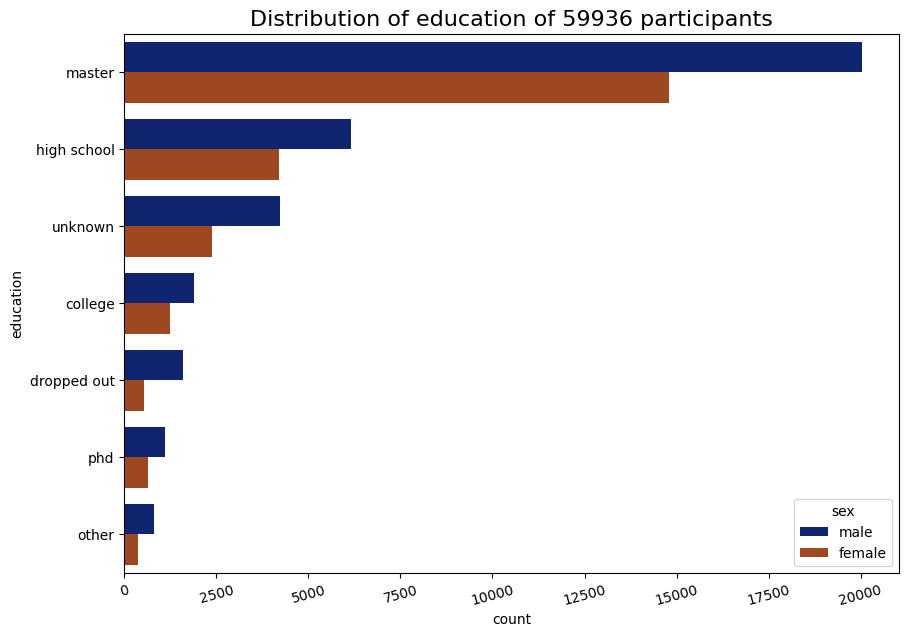

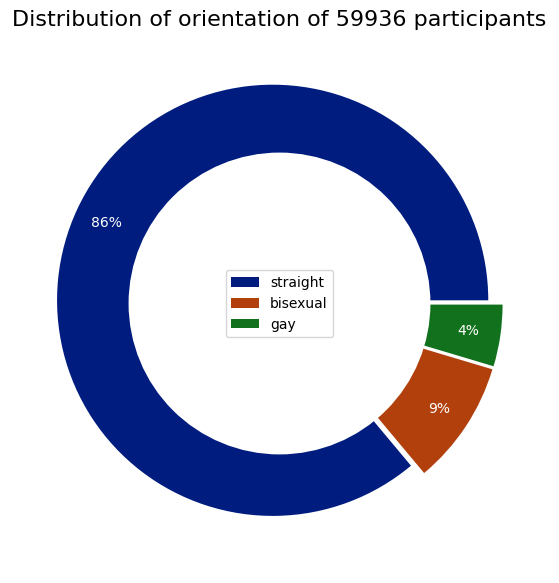

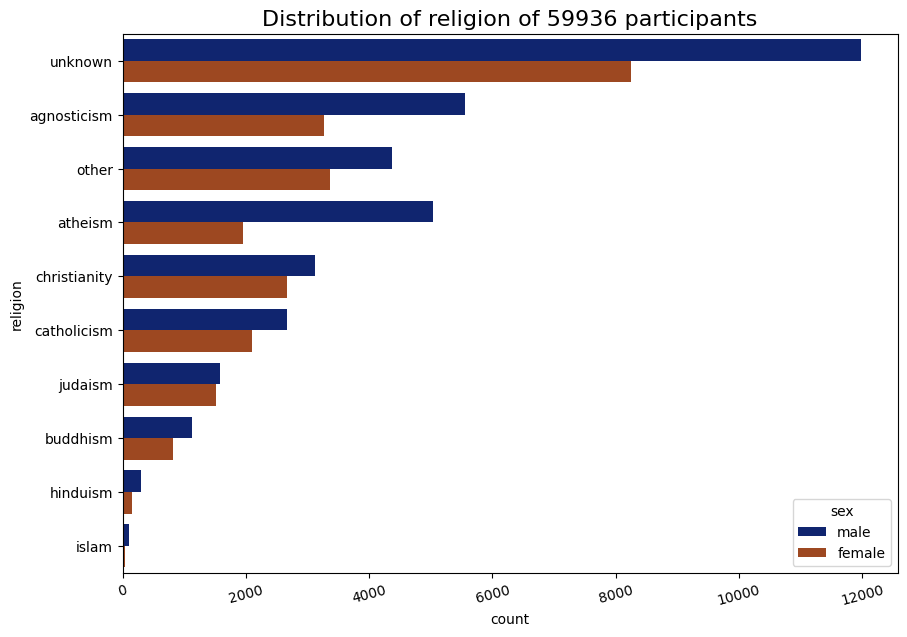

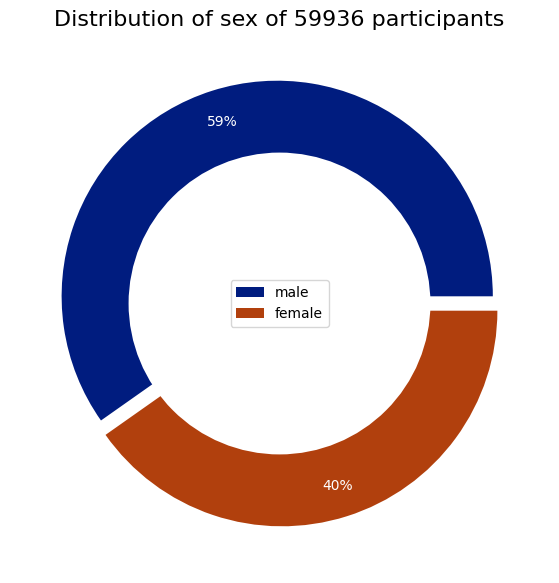

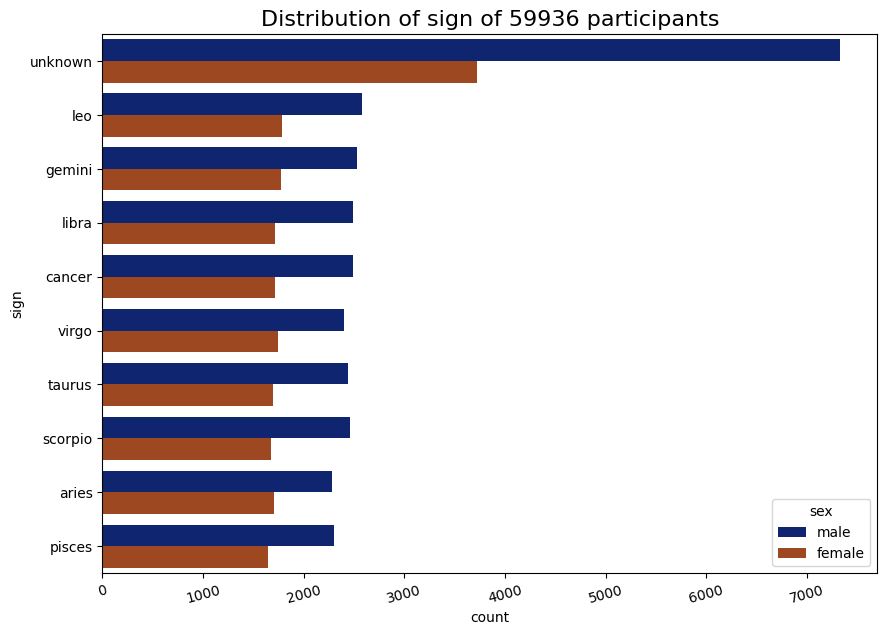

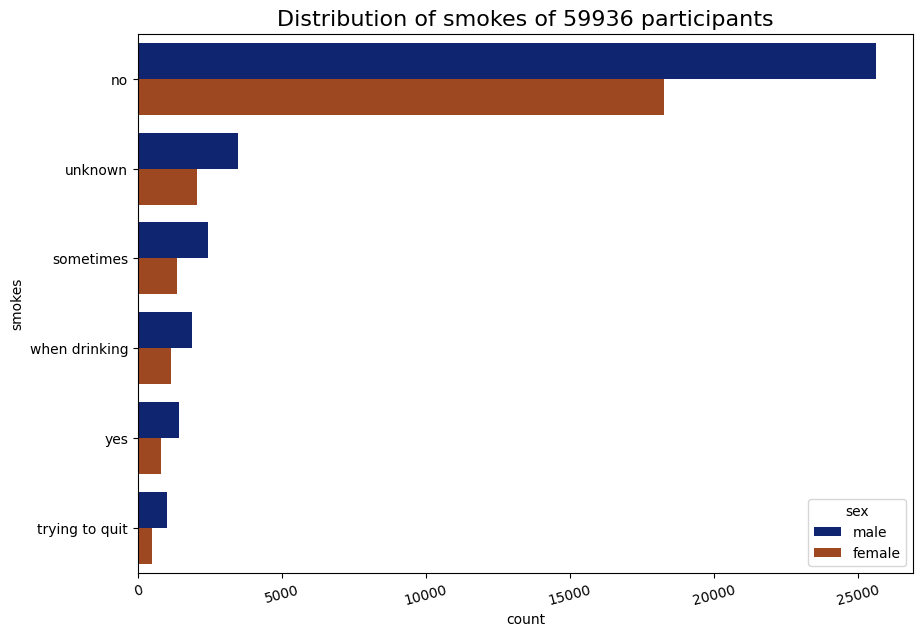

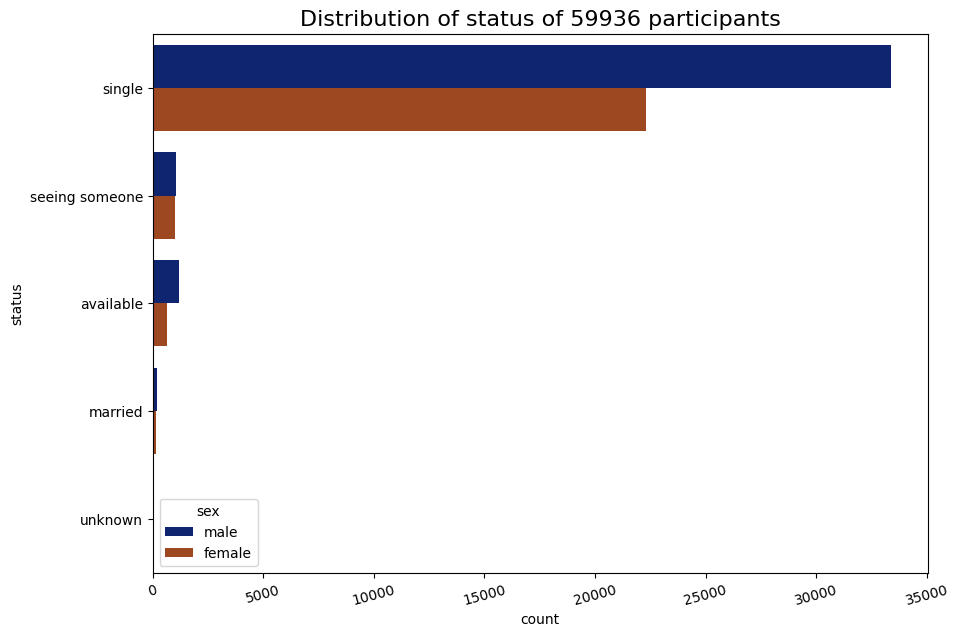

In [34]:
print('\n')
question = input('Would you like to see some pie charts and countplots? Enter "yes", or "no"! ')
if question == 'yes':
    vis.pie_and_countplot(cats_and_nums, df, 'sex')

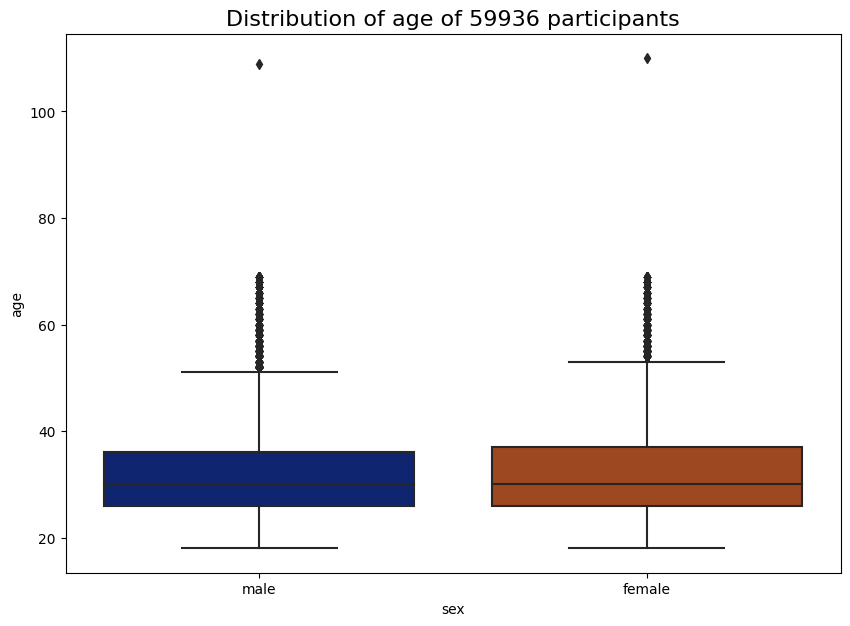

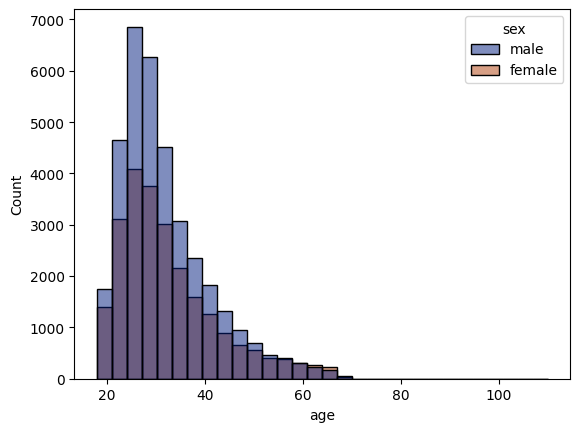

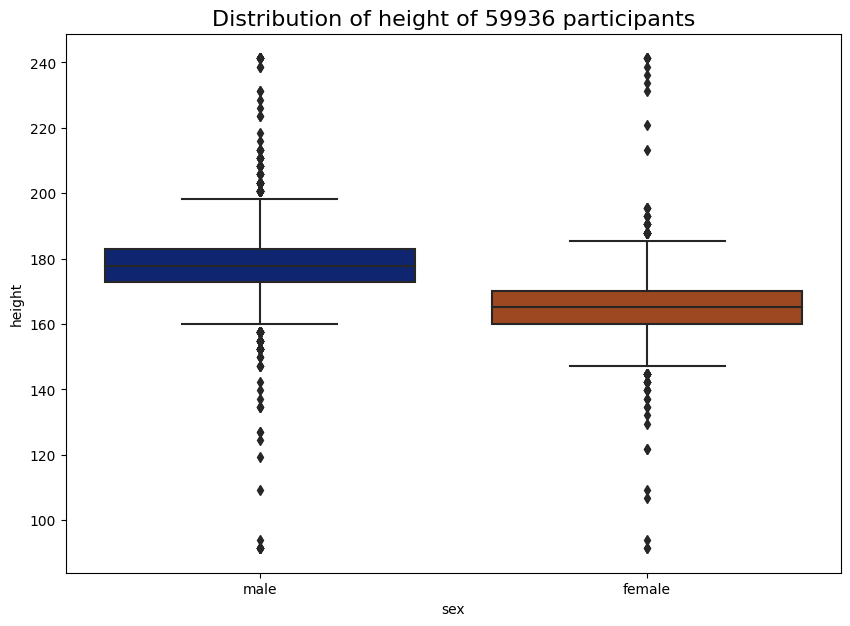

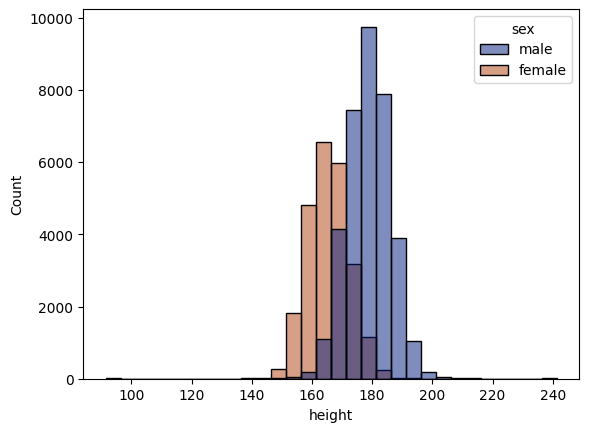

In [35]:
print('\n')
question = input('Would you like to see some histograms? Enter "yes", or "no"! ')
if question == 'yes':
    vis.histogram(cats_and_nums, df, 'sex')

`Making some dataframes by copying the original`

In [36]:
df_model = df.copy()
df_new = df.copy()

In [37]:
df_model.head(1)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,anything,socially,never,high school,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism,male,gemini,sometimes,english,single


In [38]:
df_model.sex = df_model.sex.map({'male':1, 'female':0})
df_model.orientation = df_model.orientation.replace(['straight', 'bisexual', 'gay'], [2, 1, 0])
df_model.status = df_model['status'].replace(['single', 'available'], 1)
df_model.status = df_model['status'].replace(['married', 'seeing someone', 'unknown'], 0)

df_model.smokes = np.where(df_model.smokes == 'no', 1, 0)
df_model.drugs = np.where(df_model.drugs == 'never', 1, 0)

`Making some labels automatically`

In [39]:
encodeable = [feat for feat in cats_and_nums if feat not in ['sex', 'orientation', 'status', 'smokes', 'drugs', 'age', 'height']]

In [40]:
for uncoded in encodeable:
    encoder = LabelEncoder()
    df_model[uncoded] = encoder.fit_transform(df_model[uncoded])

In [41]:
df_model = df_model[cats_and_nums]

In [42]:
#scaler = StandardScaler()

In [43]:
#df_model = scaler.fit_transform(df_model)
#df_model

`Making a function to build and use LogisticRegression model.`

In [44]:
import pandas as pd

In [45]:
def model_log(df: pd.DataFrame, target: str) -> dict:
    
    df = df[df[target] != 'unknown']
    df = df.sample(int(.25*len(df)))
    X = df.drop(target, axis=1)
    y = df[target]
    scaler = StandardScaler()
    scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=15)
    model = LogisticRegression(max_iter=3500, solver='saga')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return {'Logistic model': model._estimator_type, 'Features': list(X.columns), 'Target': target, 'Accuracy:': '%.3f' % accuracy}

In [46]:
log_test_sign = model_log(df_model, 'sign')

In [47]:
print(log_test_sign)

{'Logistic model': 'classifier', 'Features': ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height', 'orientation', 'religion', 'sex', 'smokes', 'status'], 'Target': 'sign', 'Accuracy:': '0.196'}


In [48]:
##encoder = LabelEncoder()
#df.sign = encoder.fit_transform(df.sign)

In [49]:
target = 'orientation'
sample = df_model.sample(10000, replace=True)
X = sample.drop(target, axis=1)
y = sample[target]

In [50]:
X

,age,body_type,diet,drinks,drugs,education,height,religion,sex,sign,smokes,status
14619,34,2,4,4,0,1,170.18,0,0,10,0,0
39348,26,2,6,4,1,5,177.80,1,1,11,1,1
9541,38,4,0,4,0,3,177.80,0,0,12,1,1
4883,25,1,4,4,1,3,175.26,3,1,4,0,1
5283,45,2,4,4,0,3,167.64,7,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20551,25,1,4,4,0,6,180.34,0,1,4,1,1
17906,30,1,4,4,0,3,190.50,9,1,11,1,1
29315,29,1,0,4,1,2,170.18,0,0,11,1,1
17577,29,4,0,4,0,3,177.80,9,1,1,1,1


In [51]:
y

14619    1
39348    2
9541     2
4883     2
5283     2
        ..
20551    0
17906    2
29315    2
17577    2
49746    2
Name: orientation, Length: 10000, dtype: int64

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [53]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=10)
bag_dt.fit(x_train, y_train)
bag_accuracy = bag_dt.score(x_test, y_test)
print('Accuracy score of Bagged Classifier, 10 estimators: %.3f' % bag_accuracy)

Accuracy score of Bagged Classifier, 10 estimators: 0.868


In [54]:
np.random.seed(42)
accus_test = []
neighbors = range(1,50)
for neighbor in neighbors:
    model = KNeighborsClassifier(n_neighbors=neighbor)
    StandardScaler().fit_transform(X)
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    accus_test.append(accuracy_score(y_test, y_pred_test))
best_acc_neighbors = np.max(accus_test)
best_neighbors = neighbors[np.argmax(accus_test)]
print('Best accuracy with using k Nearest neighbors is: %.3f' % best_acc_neighbors, ' and the best number of neighbors is: ', best_neighbors)

Best accuracy with using k Nearest neighbors is: 0.868  and the best number of neighbors is:  14


In [55]:
np.random.seed(42)
accuracy_train=[]
accuracy_test = []
depths = range(1,20)
for depth in depths:
  model = RandomForestClassifier(max_depth=depth)
  model.fit(x_train, y_train)
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)
  accuracy_train.append(accuracy_score(y_train, y_pred_train))
  accuracy_test.append(accuracy_score(y_test, y_pred_test))
best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print('Best accuracy with using Randomforest is: ', best_acc, ' and the best depth is: ', best_depth)

Best accuracy with using Randomforest is:  0.8763333333333333  and the best depth is:  18


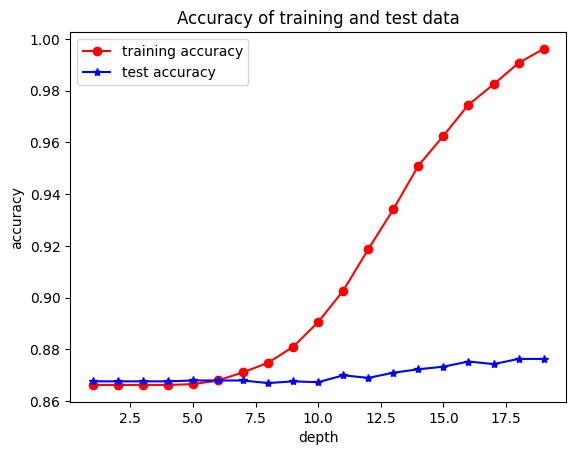

<Figure size 640x480 with 0 Axes>

In [56]:
vis.randfor_test_plot(depths, accuracy_train, accuracy_test)

In [57]:
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=18)

In [58]:
feature_importance = pd.DataFrame(zip(x_train.columns, best_rf.feature_importances_), columns=['features', 'importances']).sort_values('importances', ascending=False)
feature_importance.iloc[:5]

,features,importances
0,age,0.186333
6,height,0.156300
9,sign,0.138686
1,body_type,0.119207
7,religion,0.102794


In [59]:
features = ['sign', 'age', 'height', 'sex', 'orientation', 'body_type', 'diet', 'drinks',  'smokes', 'drugs', 'education', 'religion', 'status']

In [60]:
df_new = df_new[features][df_new.sign != 'unknown']

In [61]:
X_new = pd.get_dummies(df_new[features[1:]], drop_first=True)
X_new

,age,height,sex_male,orientation_gay,orientation_straight,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,...,religion_christianity,religion_hinduism,religion_islam,religion_judaism,religion_other,religion_unknown,status_married,status_seeing someone,status_single,status_unknown
0,22,190.50,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,35,177.80,True,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,38,172.72,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,23,180.34,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,29,167.64,True,False,True,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,157.48,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
59942,24,182.88,True,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
59943,42,180.34,True,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
59944,27,185.42,True,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [62]:
y_new = df_new[features[0]]

In [63]:
y_new

0             gemini
1             cancer
2             pisces
3             pisces
4           aquarius
            ...     
59941         cancer
59942            leo
59943    sagittarius
59944            leo
59945         gemini
Name: sign, Length: 48883, dtype: object

In [64]:
neighbors = KNeighborsClassifier(n_neighbors=1)

In [65]:
scaler = StandardScaler()

In [66]:
X_new = scaler.fit_transform(X_new)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y_new, test_size=.25, random_state=100)

In [68]:
neighbors.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [69]:
y_pred = neighbors.predict(x_test)

In [70]:
accuracy_score(y_test, y_pred)

0.08714507814417806

In [71]:
np.random.seed(0)
accus_test = []
neighbors = range(1,50)
for neighbor in neighbors:
    model = KNeighborsClassifier(n_neighbors=neighbor)
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    accus_test.append(accuracy_score(y_test, y_pred_test))
best_acc_neighbors = np.max(accus_test)
best_neighbors = neighbors[np.argmax(accus_test)]
print('Best accuracy with using k Nearest neighbors is: ', best_acc_neighbors, ' and the best number of neighbors is: ', best_neighbors)

Best accuracy with using k Nearest neighbors is:  0.08722690450863269  and the best number of neighbors is:  2


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    aquarius       0.10      0.09      0.10      1026
       aries       0.08      0.08      0.08       989
      cancer       0.09      0.09      0.09      1040
   capricorn       0.08      0.08      0.08       881
      gemini       0.09      0.09      0.09      1074
         leo       0.09      0.09      0.09      1114
       libra       0.09      0.09      0.09      1069
      pisces       0.09      0.09      0.09       961
 sagittarius       0.10      0.10      0.10      1026
     scorpio       0.07      0.07      0.07      1030
      taurus       0.08      0.09      0.08       968
       virgo       0.09      0.09      0.09      1043

    accuracy                           0.09     12221
   macro avg       0.09      0.09      0.09     12221
weighted avg       0.09      0.09      0.09     12221



In [73]:
array = np.array(X_new)
array

array([[-1.10381052,  1.73107235,  0.84601111, ..., -0.19280297,
         0.28098401, -0.01279386],
       [ 0.27653965,  0.45806648,  0.84601111, ..., -0.19280297,
         0.28098401, -0.01279386],
       [ 0.595082  , -0.05113586,  0.84601111, ..., -0.19280297,
        -3.55892135, -0.01279386],
       ...,
       [ 1.01980513,  0.71266766,  0.84601111, ..., -0.19280297,
         0.28098401, -0.01279386],
       [-0.57290661,  1.22187   ,  0.84601111, ..., -0.19280297,
         0.28098401, -0.01279386],
       [ 0.70126278, -0.05113586,  0.84601111, ..., -0.19280297,
         0.28098401, -0.01279386]])